- 대용량 데이터 핸들링
- 분석의 방향성 설정 연습
- XAI (정확도와 해석력을 높이기 위한 방법)학습 - 모델링 기획 단계에서 3가지? 속도, 정확도, 해석력 
- 비지도 학습

In [1]:
import sklearn                         # sklearn 모듈 호출
from sklearn.datasets import load_iris # 붖꽃 데이터 불러오기 sklearn 내장 데이터


iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
import pandas as pd

df1 = pd.DataFrame(data = iris['data'], columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df1['species'] = iris['target'] # target이 label 타켓이 0,1,2로 되어있어 우선 쉽게 보기위해 이름을 부여
def func(x):
    if x == 0:
        return 'setosa'
    elif x == 1:
        return 'versicolor'
    elif x == 2:
        return 'virginica'
df1['species'] = df1['species'].apply(lambda x : func(x))
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df = pd.read_csv("iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
set(df['species'])

{'setosa', 'versicolor', 'virginica'}

In [6]:
df['species'].value_counts() # 데이터가 균형있게 분포되어있다.

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<AxesSubplot:>

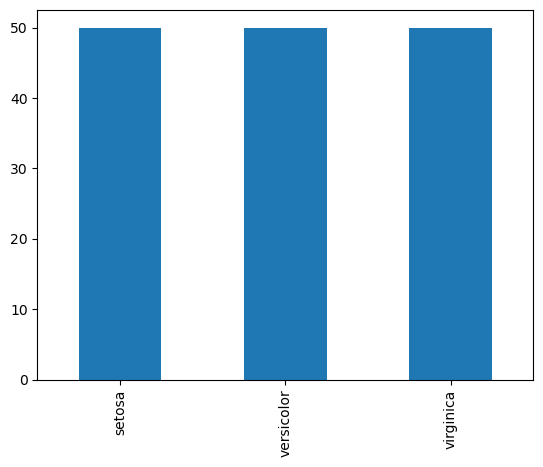

In [7]:
df['species'].value_counts().plot(kind = 'bar')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
origin_target = ['setosa', 'versicolor', 'virginica']

mapper = {'setosa' : 0, 'versicolor' : 1, 'virginica' : 2}
df['species'] = df['species'].map(mapper)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
import seaborn as sns

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

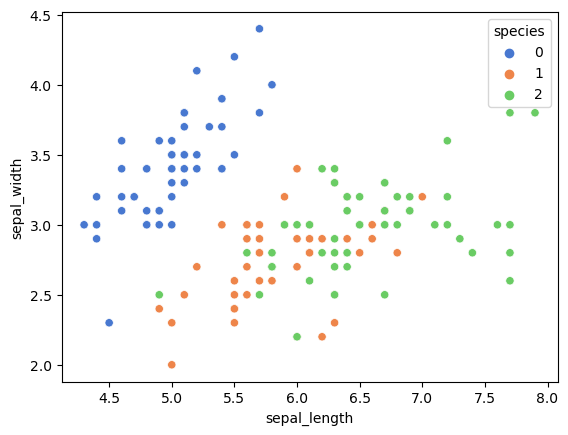

In [11]:
sns.scatterplot(data = df, x = 'sepal_length', y ='sepal_width', hue = 'species', palette = 'muted') # scatterplot을 활용하여 데이터의 분포를 확인

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

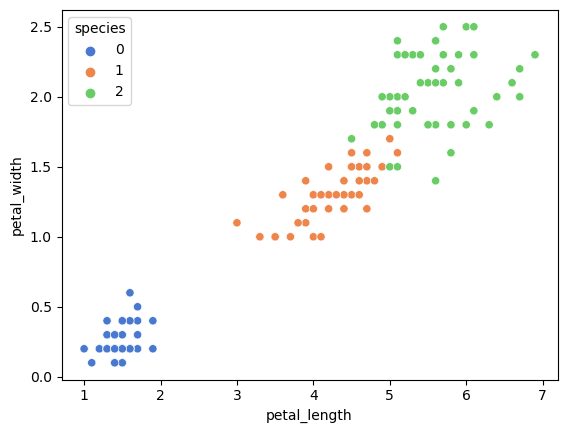

In [12]:
sns.scatterplot(data = df, x = 'petal_length', y ='petal_width', hue = 'species', palette = 'muted')
# 위와 마찬가지로 붖꽃 데이터의 분포를 x와 y를 변경하여 확인

In [13]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [14]:
label = 'species'
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

X = df[features]
y = df[label]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0, stratify = y )#데이터의 분포가 균등하게 해준다.

In [16]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [17]:
y_train.value_counts()

0    40
1    40
2    40
Name: species, dtype: int64

In [18]:
# 종속변수가 범주형이므로 의사결정나무의 분류나무로 모델링 진행

from sklearn.tree import DecisionTreeClassifier as dt

model = dt()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
model.score(X_test, y_test)

0.9666666666666667

In [20]:
y_pred = model.predict(X_test)
sum((y_test == y_pred)) / len(y_test)

0.9666666666666667

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9666666666666667

In [22]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
idx = int(model.predict([[4.7, 3.2, 1.4, 0.3]]))
origin_target[idx]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'setosa'

In [24]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [25]:
# 회귀 문제 (예측)
# 종속변수를 수치형(연속형)으로 선택하여 예측하는 방식으로 모델링 진행

features = ['sepal_width', 'petal_length', 'petal_width',
       'species']
label = 'sepal_length'

X = df[features]
y = df[label]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

In [27]:
from sklearn.linear_model import LinearRegression as lr

model = lr()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
model.score(X_test, y_test) # default R2 (결정계수)

0.7932315971704409

In [29]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.32429462612339105

In [30]:
r2_score(y_test, y_pred)

0.7932315971704409

In [31]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X_train, y_train, cv = 10)
score.mean()

0.8155158413241672